# Introdução ao NetworkX

De acordo com a documentação oficial, NetworkX é “um pacote para a criação, manipulação e estudo da estrutura, dinâmica e funções de redes complexas”. Ele pode ser facilmente instalado via pip e depois importado para o seu notebook.

Então, vamos construir nosso primeiro grafo passo a passo:

In [1]:
#importando a biblioteca
import networkx as nx

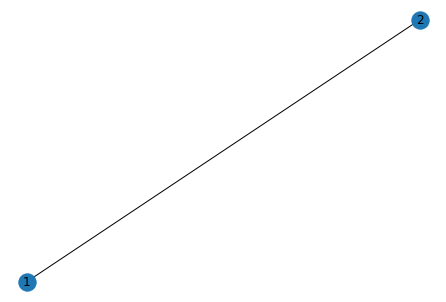

In [2]:
# inicializando o grafo
G = nx.Graph()

# adicionando um nó
G.add_node(1)

# adicionando outro nó
G.add_node(2)

# adicionando uma aresta entre dois nós (não direcionado)
G.add_edge(1,2)

# exibindo o grafo
nx.draw(G, with_labels=True)

Também podemos criar um grafo direcionado:

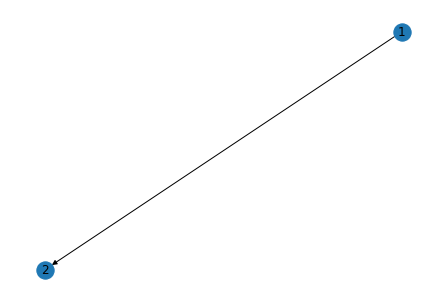

In [3]:
# inicializando o grafo direcionado
DG = nx.DiGraph() 

# adicionando um nó
DG.add_node(1)

# adicionando outro nó
DG.add_node(2)

# adicionando uma aresta entre os dois nós 
# a ordem dos nós indica a direção. Ex: 1 -> 2
DG.add_edge(1,2)

# exibindo o grafo
nx.draw(DG, with_labels=True)

É possível, se fornecido com um grafo direcionado, convertê-lo em um não direcionado (mas não o contrário):

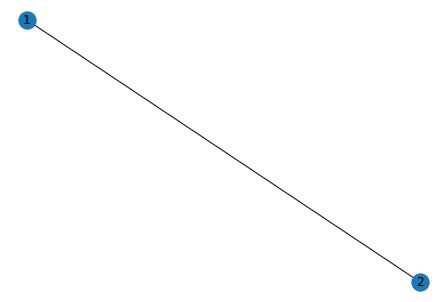

In [4]:
G = nx.Graph(DG) 
nx.draw(G, with_labels=True)

Podemos criar um grafo nó por nó, aresta por aresta do zero com o NetworkX. No entanto, existem funcionalidades mais interessantes neste pacote que permitem aos usuários criar grafos de acordo com parâmetros e formas predefinidas, e vamos examiná-los enquanto falamos sobre os diferentes tipos de grafos.

## Grafo Aleatório

Como o nome sugere, um grafo aleatório é um conjunto de nós conectados por links de forma puramente aleatória.

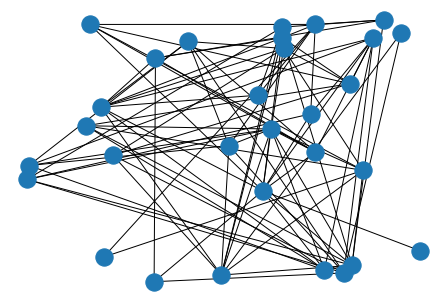

In [5]:
G_random = nx.gnp_random_graph(n = 30, p = 0.2) 
#n=número de nós, p=probabilidade de relacionamento (aresta)

nx.draw_random(G_random)

Nesse caso, definimos uma probabilidade de criação de aresta igual a 20%. Podemos tentar diminuí-lo / aumentá-lo para obter um formato diferente de grafos (desta vez com tamanho = 10):

In [6]:
import matplotlib.pyplot as plt

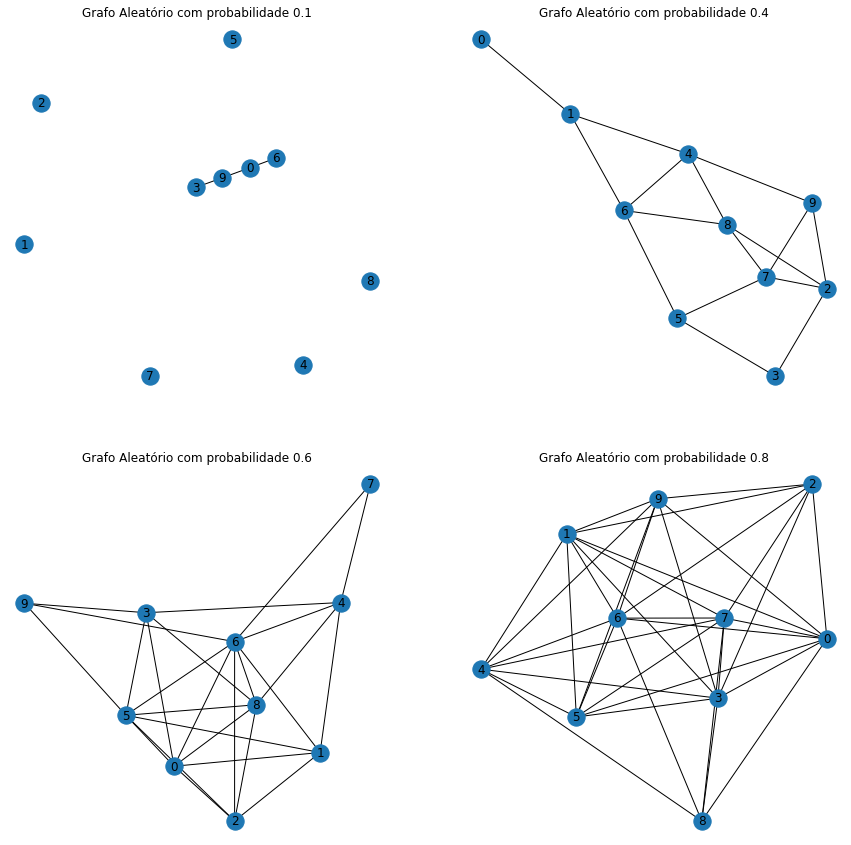

In [7]:
p = [0.1, 0.4, 0.6, 0.8]
graphs = [nx.gnp_random_graph(10,i) for i in p]
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
ax = axes.flatten()
for i in range(4):
    nx.draw_networkx(graphs[i], ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title('Grafo Aleatório com probabilidade {}'.format(p[i]))
plt.show()

Como você pode ver, quando a probabilidade é baixa, o grafo parece esparso, enquanto com p = 0,8 está quase completo (conseqüentemente, obtemos o grafo completo quando p = 1).

## Grafo de conexão preferencial

Esta categoria difere desta última na forma como os links são gerados. De fato, no grafo de conexão preferencial, quando novos nós são adicionados, a probabilidade de eles estarem conectados a um nó bem conectado é maior do que a de estarem conectados a um nó mal conectado. 

Em outras palavras, se em um grafo existe o nó A com grau = 5 e o nó B com grau = 2, quando o nó C entra no grafo, a probabilidade de ligação com A é maior do que a de ligação com B. 

Como resultado, o grafo final terá poucos nós com graus muito altos, enquanto muitos nós com graus baixos.

Vamos ver como o NetworkX pode representar esses grafo. O método é denominado barabasi_albert_graph devido aos nomes daqueles que abordaram este trabalho primeiro (Barabasi e Albert, 1999):

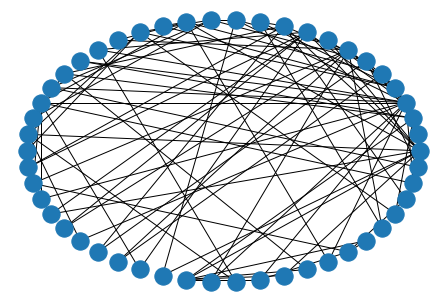

In [8]:
G_pref = nx.barabasi_albert_graph(n=50, m=2) 
# n=número de nós, m=número de arestas para cada nó adicional

nx.draw_circular(G_pref) 
# usando um layout circular

É possível notar, na área superior direita há uma densidade maior de links, enquanto os nós inferiores esquerdos exibem um grau inferior.

Podemos verificar a diferença entre este grafo e um grafo aleatório (usando também, neste caso, um layout circular):

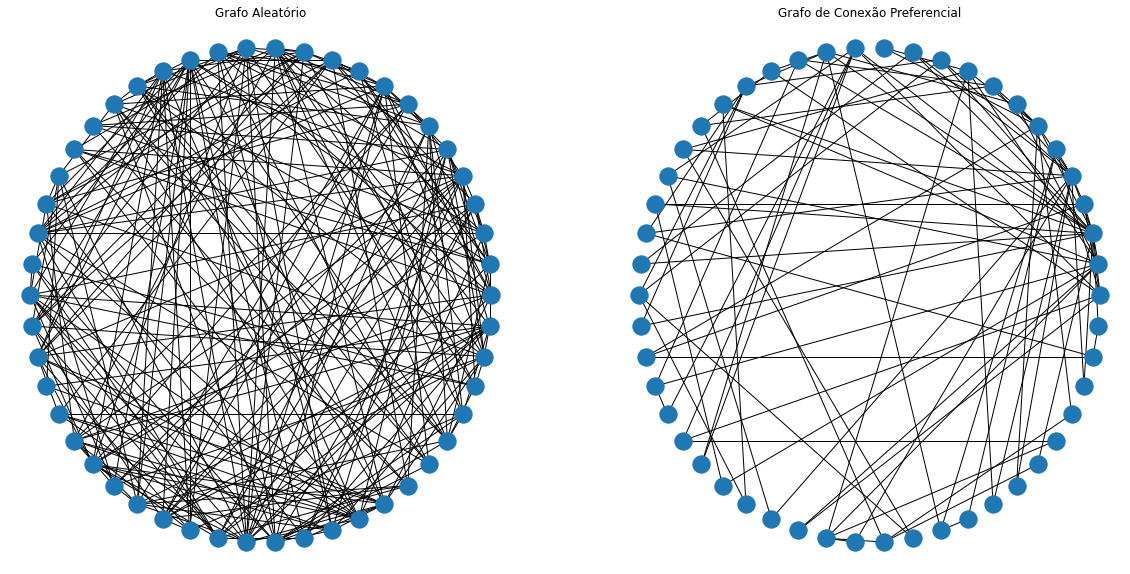

In [9]:
graphs = [nx.gnp_random_graph(50,0.2), nx.barabasi_albert_graph(n=50, m=2)]
names = ['Grafo Aleatório', 'Grafo de Conexão Preferencial']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
ax = axes.flatten()
for i in range(2):
    nx.draw_circular(graphs[i], ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(names[i])
plt.show()

Os grafos de conexao preferencial são uma representação matemática da situação onde “os ricos ficam mais ricos e os pobres ficam mais pobres”, onde “ricos” são os nós com um alto grau.

Observe que o mecanismo de conexão preferencial é aquele usado para gerar as chamadas redes sem escala.

Uma rede sem escala é uma rede cuja distribuição de graus segue uma lei de potência.

A ideia de redes sem escala é que, dentro do sistema, existem poucos nós importantes que dão robustez à estrutura, enquanto a maioria dos nós não são tão indispensáveis.

## Grafo de Pequeno Mundo

Um grafo de pequeno mundo define uma estrutura onde muitos nós estão conectados a nós próximos, enquanto alguns nós estão conectados a nós que estão distantes. 

O nome dessa estrutura matemática reflete a realidade peculiar das conexões de conhecidos entre os seres humanos, cujo estudo remonta a 1967, quando Stanley Milgram, psicólogo social da Universidade de Harvard, conduziu um experimento muito interessante.

Ele enviou centenas de cartas a desconhecidos que moravam em Nebraska, pedindo-lhes que entregassem a carta a um corretor da bolsa em Boston.

Verificou-se que a distância média entre essas pessoas e o corretor (totalmente desconhecido para eles), em termos de número de pessoas entre o primeiro destinatário e o destinatário final (o corretor), era de 6 pessoas.

Em outras palavras, leva, em média, apenas “6 pessoas” para chegar a um indivíduo completamente desconhecido.

Então, vamos visualizar a estrutura de um pequeno gráfico mundial:

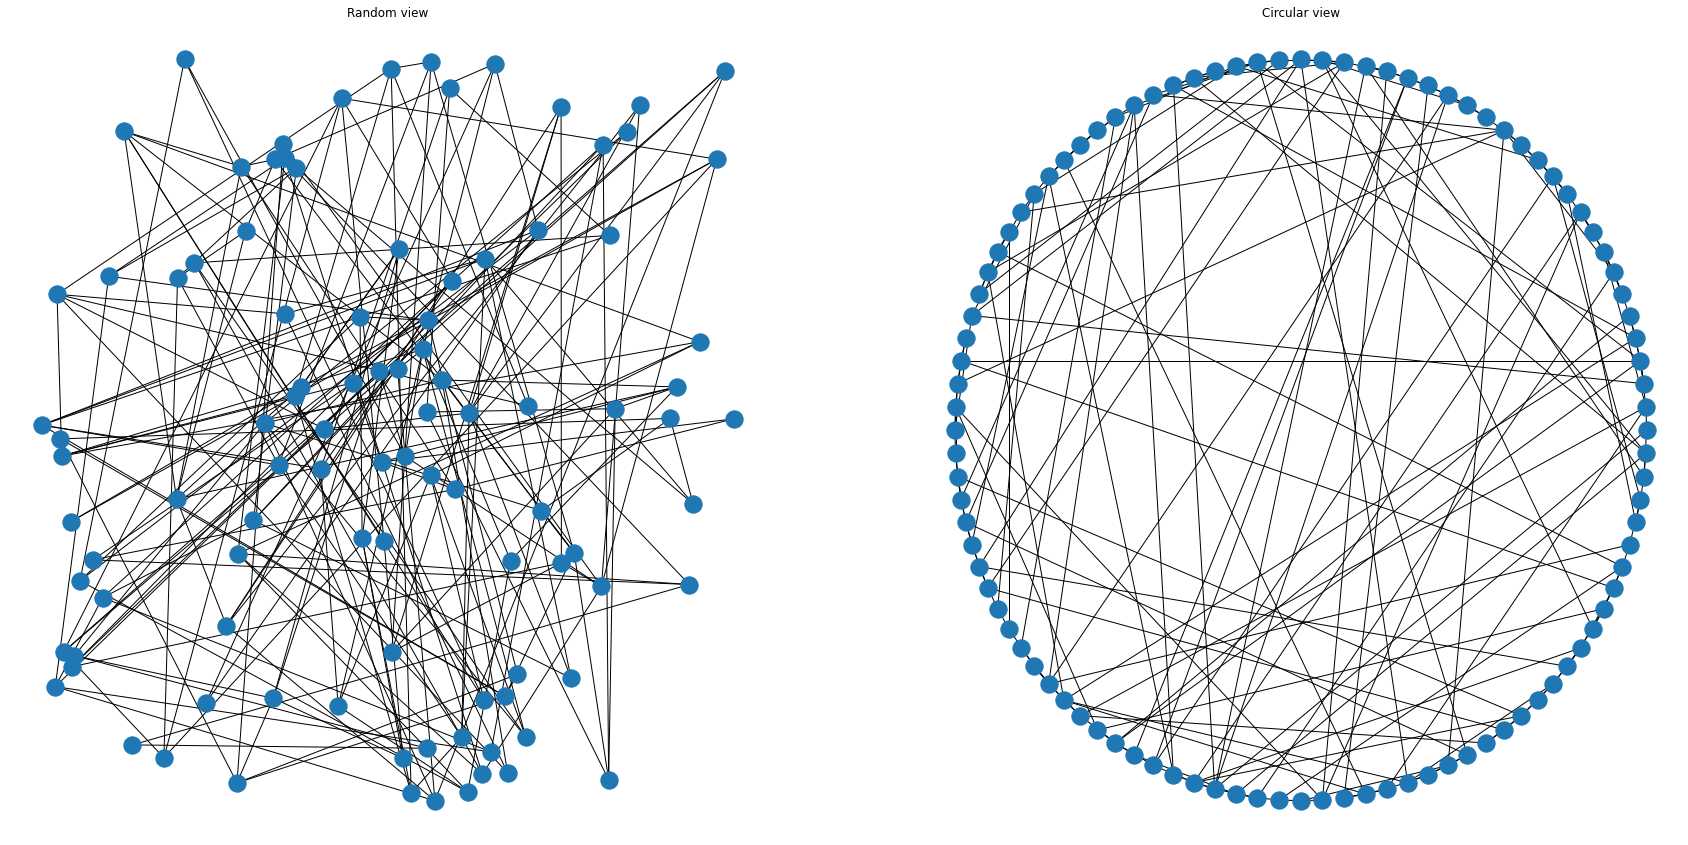

In [11]:
G_small_world = nx.watts_strogatz_graph(n=100, k = 5, p = 0.4) 
#n=número de nós, k=número de links próximos, p=probabilidade de religar um link para um nó distante

graphs = [G_small_world, G_small_world]
names = ['Random view', 'Circular view']
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(30,15))
ax = axes.flatten()

nx.draw_random(graphs[0], ax=ax[0])
ax[0].set_axis_off()
ax[0].set_title(names[0])

nx.draw_circular(graphs[1], ax=ax[1])
ax[1].set_axis_off()
ax[1].set_title(names[1])

plt.show()

## Conclusão

Temos nos concentrado em três categorias diferentes de gráficos, cada um útil na descrição de diferentes fenômenos. 

Vamos dar uma olhada final nas três representações e suas distribuições de graus:

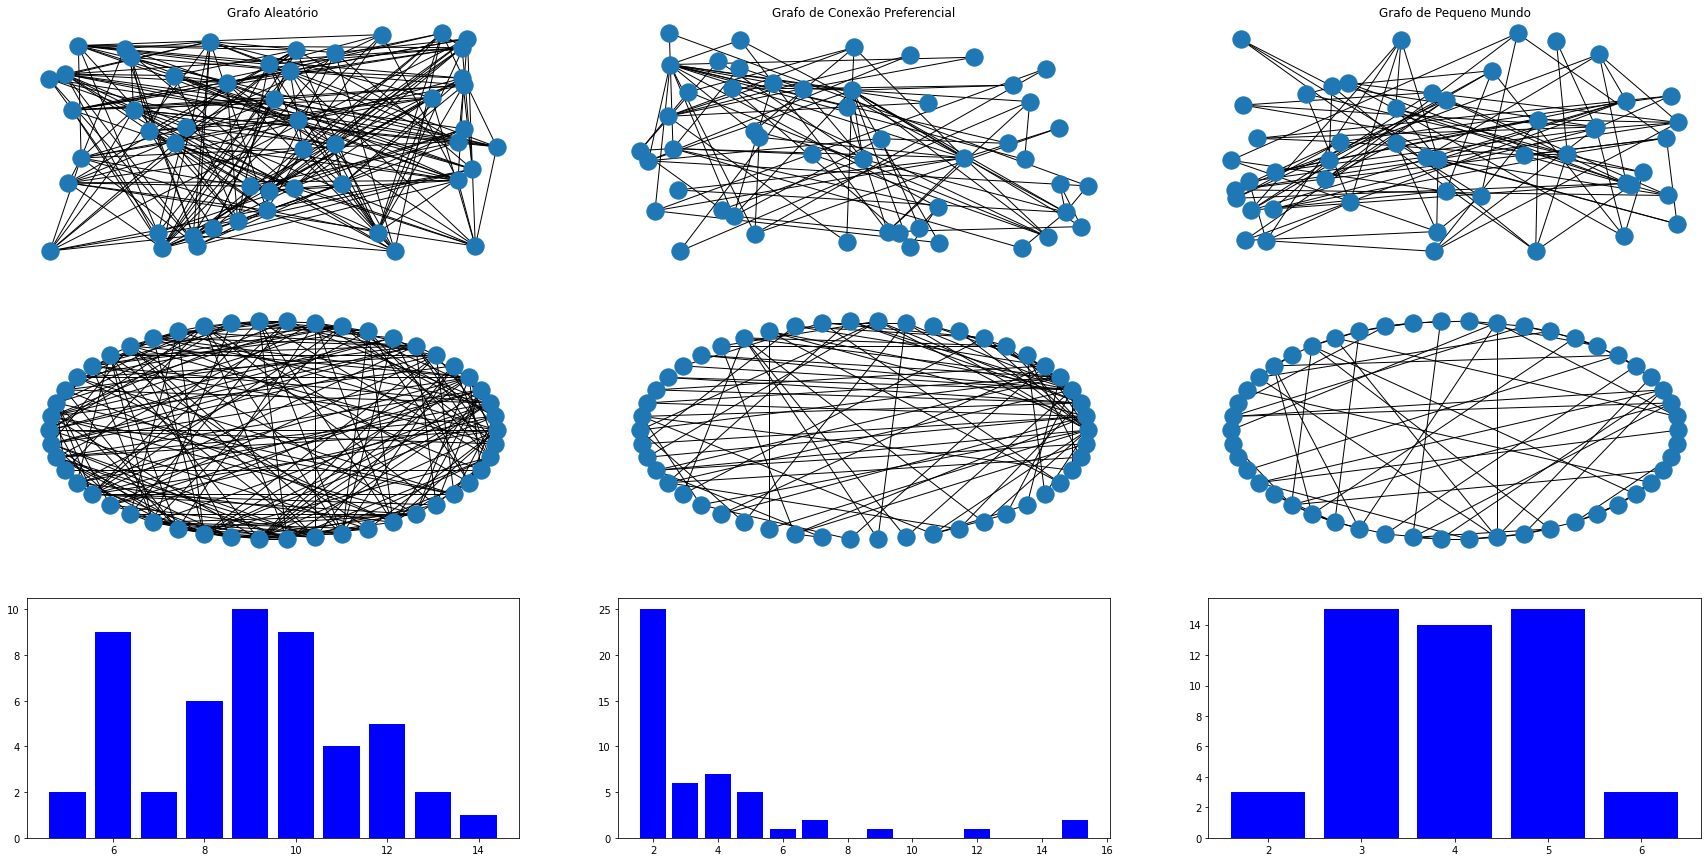

In [12]:
import collections
graphs = [nx.gnp_random_graph(50,0.2), nx.barabasi_albert_graph(n=50, m=2), nx.watts_strogatz_graph(n=50, k = 5, p = 0.4)]
names = ['Grafo Aleatório', 'Grafo de Conexão Preferencial', 'Grafo de Pequeno Mundo']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30,15))
ax = axes.flatten()

for i in range(3):
    nx.draw_random(graphs[i], ax=ax[i])
    ax[i].set_axis_off()
    ax[i].set_title(names[i])
    
for i in range(3, 6):
    nx.draw_circular(graphs[i-3], ax=ax[i])
    ax[i].set_axis_off()
    
for i in range(6, 9):
    degree_sequence = sorted([d for n, d in graphs[i-6].degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())
    ax[i].bar(deg, cnt, width=0.80, color='b')
    
plt.show()

Como você pode ver, a distribuição de grau do grafo de conexão preferencial é exponencial: apenas alguns nós são realmente importantes dentro do sistema (também conhecido como eles têm muitas conexões com outros nós), enquanto a maioria dos nós é puramente conectado e, se removido, eles não prejudicariam todo o sistema.